<b>Regularization is a method to reduce overfitting by penalizing complexity in the model.</b>

It introduces a penalty term to the loss function, so the model doesn’t just fit the training data, it learns to be simpler or more generalizable.

Deep Learning has the same concept, just different implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Reshape to 1D for easier handling
X = X.ravel()
y = y.ravel()

In [2]:
def compute_mse_cost(X, y, w, b):
    m = len(y)
    y_pred = w * X + b
    return (1/m) * np.sum((y_pred - y) ** 2)

def compute_ridge_cost(X, y, w, b, lambd):
    mse = compute_mse_cost(X, y, w, b)
    l2_penalty = lambd * (w ** 2)
    return mse + l2_penalty

def compute_lasso_cost(X, y, w, b, lambd):
    mse = compute_mse_cost(X, y, w, b)
    l1_penalty = lambd * abs(w)
    return mse + l1_penalty

In [11]:
def train_linear(X, y, lr=0.1, epochs=200):
    w, b = 0.0, 0.0
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = w * X + b
        error = y_pred - y

        dw = (2/m) * np.dot(error, X)
        db = (2/m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        cost = compute_mse_cost(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

def train_ridge(X, y, lr=0.1, epochs=200, lambd=0.1):
    w, b = 0.0, 0.0
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = w * X + b
        error = y_pred - y

        dw = (2/m) * np.dot(error, X) + 2 * lambd * w
        db = (2/m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        cost = compute_ridge_cost(X, y, w, b, lambd)
        cost_history.append(cost)

    return w, b, cost_history

def train_lasso(X, y, lr=0.1, epochs=200, lambd=0.1):
    w, b = 0.0, 0.0
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = w * X + b
        error = y_pred - y

        dw = (2/m) * np.dot(error, X) + lambd * np.sign(w)
        db = (2/m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        cost = compute_lasso_cost(X, y, w, b, lambd)
        cost_history.append(cost)

    return w, b, cost_history

In [12]:
w_base, b_base, history_base = train_linear(X, y)
w_ridge, b_ridge, history_ridge = train_ridge(X, y, lambd=0.5)
w_lasso, b_lasso, history_lasso = train_lasso(X, y, lambd=0.5)

print(f"Linear: w={w_base:.2f}, b={b_base:.2f}")
print(f"Ridge : w={w_ridge:.2f}, b={b_ridge:.2f}")
print(f"Lasso : w={w_lasso:.2f}, b={b_lasso:.2f}")

Linear: w=2.77, b=4.21
Ridge : w=1.14, b=5.75
Lasso : w=2.06, b=4.88


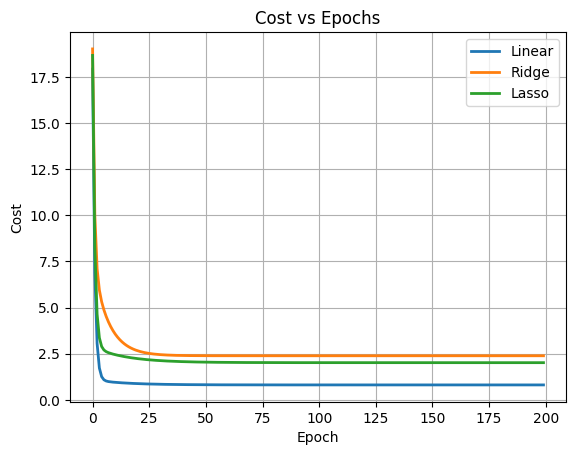

In [13]:
plt.plot(history_base, label="Linear", linewidth=2)
plt.plot(history_ridge, label="Ridge", linewidth=2)
plt.plot(history_lasso, label="Lasso", linewidth=2)

plt.title("Cost vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

All models converge quickly within ~50 epochs.

L2 (Ridge) and L1 (Lasso) reach higher final cost than linear: this is expected, they trade off accuracy for generalisation.

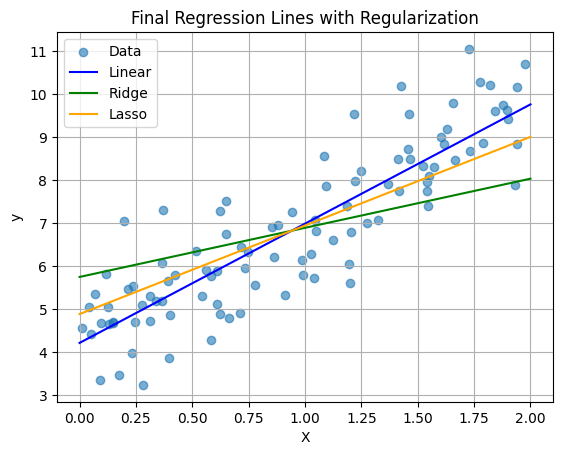

In [15]:
plt.scatter(X, y, label="Data", alpha=0.6)

x_line = np.linspace(0, 2, 100)
plt.plot(x_line, w_base * x_line + b_base, label="Linear", color='blue')
plt.plot(x_line, w_ridge * x_line + b_ridge, label="Ridge", color='green')
plt.plot(x_line, w_lasso * x_line + b_lasso, label="Lasso", color='orange')

plt.title("Final Regression Lines with Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Blue line (Linear): Fits the data most closely but more vulnerable to overfitting.

Green line (Ridge): The flattest, it penalises large weights, reducing slope magnitude.

Orange line (Lasso): Moderately in between, balances fitting and regularisation.

Data: Spread shows some variance/noise and regularisation helps avoid chasing that noise.

Regularisation reduces the slope, pulling the model back from extremes. If you increase lambda, the Ridge and Lasso lines would become even flatter.